## Launching NEAT on Space Invaders RAM

In [1]:
import gym
import os
import numpy as np
from neat import nn, population, statistics, parallel
import neat

game_name = 'SpaceInvaders-ram-v0'

In [14]:
class Args:
    def __init__(self):
        self.max_steps = 100000                         # max timesteps for game
        self.episodes = 5                               # num of games for each individual
        self.generations = 100                          # generations to calculate
        self.checkpoint = None#"5 episodes checkpoint"  # when want to continue learning from checkpoint
        
args = Args()

In [15]:
def play(net, env, episodes=1, steps=50000, log=False):
    frames = []
    inputs = []
    actions = []
    fitnesses = []
    
    for runs in range(episodes):
        inp = env.reset()
        cum_reward = 0.0
        
        for j in range(steps):
            outputs = net.serial_activate(inp)
            action = np.argmax(outputs)
            
            if log:
                inputs.append(inp)
                actions.append(action)
            
            inp, reward, done, _ = env.step(action)
            
            if log:
                frames.append(env.render(mode = 'rgb_array'))
            
            cum_reward += reward            
            if done:
                break
            
        fitnesses.append(cum_reward)

    fitness = np.array(fitnesses).mean()
    return fitness, frames, inputs, actions

In [16]:
my_env = gym.make(game_name)

print("Input Nodes: %s" % str(len(my_env.observation_space.high)))
print("Output Nodes: %s" % str(my_env.action_space.n))
print(my_env.unwrapped.get_action_meanings())

def eval_fitness(genomes):
    for g in genomes:
        net = nn.create_feed_forward_phenotype(g)
        fitness, _, _, _ = play(net, my_env, args.episodes, args.max_steps)
        g.fitness = fitness

[2018-04-01 10:32:41,690] Making new env: SpaceInvaders-ram-v0


Input Nodes: 128
Output Nodes: 6
['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


### LEARNING

In [17]:
local_dir = "./"
config_path = os.path.join(local_dir, 'universe_config')
pop = population.Population(config_path)
# Load checkpoint
if args.checkpoint:
    pop.load_checkpoint(args.checkpoint)

pop.run(eval_fitness, args.generations)
pop.save_checkpoint("5 episodes checkpoint ms=100000")


 ****** Running generation 0 ****** 

Population's average fitness: 0.00000 stdev: 0.00000
Best fitness: 0.00000 - size: (0, 0) - species 1 - id 1
Species length: 1 totaling 150 individuals
Species ID       : [1]
Species size     : [150]
Species age      : [0]
Species no improv: {1: 0}
Average adjusted fitness: 0.000
Spawn amounts: [150]
Species fitness  : [0.0]
Generation time: 212.859 sec

 ****** Running generation 1 ****** 

Population's average fitness: 44.93333 stdev: 82.20906
Best fitness: 235.00000 - size: (0, 1) - species 1 - id 154
Species length: 1 totaling 150 individuals
Species ID       : [1]
Species size     : [150]
Species age      : [1]
Species no improv: {1: 0}
Average adjusted fitness: 0.300
Spawn amounts: [150]
Species fitness  : [0.29955555555555569]
Generation time: 235.764 sec

 ****** Running generation 2 ****** 

Population's average fitness: 184.99333 stdev: 88.71914
Best fitness: 372.00000 - size: (0, 2) - species 3 - id 378
Species length: 4 totaling 150 in

Population's average fitness: 286.74667 stdev: 171.13122
Best fitness: 661.00000 - size: (4, 11) - species 4 - id 1971
Species length: 7 totaling 150 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [23, 11, 26, 20, 11, 41, 18]
Species age      : [12, 12, 11, 11, 11, 11, 9]
Species no improv: {1: 1, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 2, 8: 0, 9: 0}
Average adjusted fitness: 15.906
Spawn amounts: [22, 13, 25, 19, 13, 40, 17]
Species fitness  : [14.396975425330812, 28.338842975206614, 12.9792899408284, 13.975, 21.793388429752067, 6.2873289708506821, 13.570987654320984]
Generation time: 331.560 sec

 ****** Running generation 15 ****** 

Population's average fitness: 272.10738 stdev: 156.12820
Best fitness: 608.00000 - size: (1, 6) - species 5 - id 2001
Species length: 7 totaling 149 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [24, 11, 25, 21, 13, 38, 17]
Species age      : [13, 13, 12, 12, 12, 12, 10]
Species no improv: {1: 1, 2: 1, 3: 0, 

Generation time: 331.474 sec

 ****** Running generation 27 ****** 

Population's average fitness: 289.35762 stdev: 170.74393
Best fitness: 608.00000 - size: (2, 7) - species 5 - id 3496
Species length: 7 totaling 151 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [22, 24, 28, 22, 18, 20, 17]
Species age      : [25, 25, 24, 24, 24, 24, 22]
Species no improv: {1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 1, 9: 1}
Average adjusted fitness: 13.078
Spawn amounts: [24, 27, 25, 20, 20, 18, 15]
Species fitness  : [14.539256198347106, 13.147569444444445, 12.682397959183675, 12.407024793388432, 14.212962962962962, 12.9125, 11.643598615916956]
Generation time: 334.824 sec

 ****** Running generation 28 ****** 

Population's average fitness: 287.01342 stdev: 168.86558
Best fitness: 608.00000 - size: (1, 6) - species 5 - id 3920
Species length: 7 totaling 149 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [25, 27, 25, 19, 20, 18, 15]
Species age   

Generation time: 349.495 sec

 ****** Running generation 40 ****** 

Population's average fitness: 325.09459 stdev: 190.98335
Best fitness: 838.00000 - size: (2, 12) - species 8 - id 5314
Species length: 7 totaling 148 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [22, 22, 25, 18, 20, 27, 14]
Species age      : [38, 38, 37, 37, 37, 37, 35]
Species no improv: {1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 3, 8: 0, 9: 1}
Average adjusted fitness: 14.854
Spawn amounts: [20, 20, 27, 20, 18, 30, 15]
Species fitness  : [14.192148760330577, 12.840909090909092, 15.134399999999998, 15.901234567901229, 14.654999999999998, 15.817558299039781, 15.438775510204083]
Generation time: 339.777 sec

 ****** Running generation 41 ****** 

Population's average fitness: 331.66667 stdev: 200.42018
Best fitness: 798.00000 - size: (2, 12) - species 8 - id 5720
Species length: 7 totaling 150 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [20, 20, 27, 20, 18, 30, 15]
S

Generation time: 385.751 sec

 ****** Running generation 53 ****** 

Population's average fitness: 369.76159 stdev: 214.84686
Best fitness: 838.00000 - size: (5, 19) - species 7 - id 6257
Species length: 7 totaling 151 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [18, 17, 25, 19, 22, 27, 23]
Species age      : [51, 51, 50, 50, 50, 50, 48]
Species no improv: {1: 1, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 2, 8: 0, 9: 0}
Average adjusted fitness: 16.706
Spawn amounts: [19, 15, 22, 20, 19, 29, 25]
Species fitness  : [18.283950617283946, 15.051903114186855, 13.580800000000002, 17.022160664819946, 13.758264462809915, 17.543209876543212, 21.699432892249522]
Generation time: 388.519 sec

 ****** Running generation 54 ****** 

Population's average fitness: 360.30201 stdev: 209.38871
Best fitness: 772.00000 - size: (5, 20) - species 8 - id 7484
Species length: 7 totaling 149 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [19, 15, 22, 19, 19, 29, 26]
S

Generation time: 409.537 sec

 ****** Running generation 66 ****** 

Population's average fitness: 367.01333 stdev: 198.10479
Best fitness: 750.00000 - size: (6, 24) - species 7 - id 8694
Species length: 7 totaling 150 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [22, 20, 25, 17, 17, 23, 26]
Species age      : [64, 64, 63, 63, 63, 63, 61]
Species no improv: {1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2, 7: 0, 8: 0, 9: 1}
Average adjusted fitness: 16.637
Spawn amounts: [23, 21, 26, 15, 18, 20, 27]
Species fitness  : [17.016528925619834, 16.824999999999999, 17.112000000000002, 14.740484429065742, 17.737024221453286, 15.780718336483933, 17.244082840236686]
Generation time: 411.439 sec

 ****** Running generation 67 ****** 

Population's average fitness: 369.58000 stdev: 204.16275
Best fitness: 750.00000 - size: (6, 24) - species 7 - id 8694
Species length: 7 totaling 150 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [23, 21, 26, 15, 18, 20, 27]
S

Average adjusted fitness: 15.548
Spawn amounts: [20, 22, 25, 15, 20, 22, 26]
Species fitness  : [14.621928166351609, 15.645000000000001, 18.206049149338376, 11.851211072664361, 13.646694214876034, 15.905000000000001, 18.960069444444446]
Generation time: 389.570 sec

 ****** Running generation 79 ****** 

Population's average fitness: 352.05333 stdev: 192.81296
Best fitness: 751.00000 - size: (7, 28) - species 7 - id 10869
Species length: 7 totaling 150 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [20, 22, 25, 15, 20, 22, 26]
Species age      : [77, 77, 76, 76, 76, 76, 74]
Species no improv: {1: 1, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 2, 9: 1}
Average adjusted fitness: 16.407
Spawn amounts: [22, 20, 22, 16, 22, 20, 28]
Species fitness  : [17.949999999999999, 15.28099173553719, 13.140799999999997, 18.399999999999995, 19.137499999999996, 14.006198347107441, 16.930473372781066]
Generation time: 395.023 sec

 ****** Running generation 80 ****** 

Population's av

Generation time: 460.564 sec

 ****** Running generation 91 ****** 

Population's average fitness: 361.00000 stdev: 201.04590
Best fitness: 765.00000 - size: (12, 36) - species 5 - id 12457
Species length: 7 totaling 150 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [22, 19, 20, 17, 20, 23, 29]
Species age      : [89, 89, 88, 88, 88, 88, 86]
Species no improv: {1: 1, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
Average adjusted fitness: 16.854
Spawn amounts: [20, 21, 23, 19, 18, 21, 27]
Species fitness  : [15.055785123966944, 17.080332409972304, 22.482500000000002, 19.166089965397916, 15.094999999999999, 13.924385633270319, 15.173602853745539]
Generation time: 437.951 sec

 ****** Running generation 92 ****** 

Population's average fitness: 323.83893 stdev: 195.57220
Best fitness: 741.00000 - size: (8, 34) - species 7 - id 12215
Species length: 7 totaling 149 individuals
Species ID       : [2, 4, 5, 6, 7, 8, 9]
Species size     : [20, 21, 23, 19, 18, 21, 27

## Let's look at result

In [18]:
print('Number of evaluations: {0}'.format(pop.total_evaluations))
winner = pop.statistics.best_genome()
print('\nBest genome:\n{!s}'.format(winner))
print('\nOutput:')

Number of evaluations: 14995

Best genome:
Nodes:
	NodeGene(id=0, type=INPUT, bias=0.0, response=4.924273, activation=sigmoid)
	NodeGene(id=1, type=INPUT, bias=0.0, response=4.924273, activation=sigmoid)
	NodeGene(id=2, type=INPUT, bias=0.0, response=4.924273, activation=sigmoid)
	NodeGene(id=3, type=INPUT, bias=0.0, response=4.924273, activation=sigmoid)
	NodeGene(id=4, type=INPUT, bias=0.0, response=4.924273, activation=sigmoid)
	NodeGene(id=5, type=INPUT, bias=0.0, response=4.924273, activation=sigmoid)
	NodeGene(id=6, type=INPUT, bias=0.0, response=4.924273, activation=sigmoid)
	NodeGene(id=7, type=INPUT, bias=0.0, response=4.924273, activation=sigmoid)
	NodeGene(id=8, type=INPUT, bias=0.0, response=4.924273, activation=sigmoid)
	NodeGene(id=9, type=INPUT, bias=0.0, response=4.924273, activation=sigmoid)
	NodeGene(id=10, type=INPUT, bias=0.0, response=4.924273, activation=sigmoid)
	NodeGene(id=11, type=INPUT, bias=0.0, response=4.924273, activation=sigmoid)
	NodeGene(id=12, type=IN

In [19]:
winner_net = nn.create_feed_forward_phenotype(winner)
r, frames, inputs, actions = play(winner_net, my_env, 1, args.max_steps, log=True)
r

1040.0

In [70]:
rewards = []
for i in range(100):
    r, _, _, _ = play(winner_net, my_env, 1, args.max_steps)
    rewards.append(r)

In [71]:
np.array(rewards).mean()

684.35000000000002

<IPython.core.display.Javascript object>


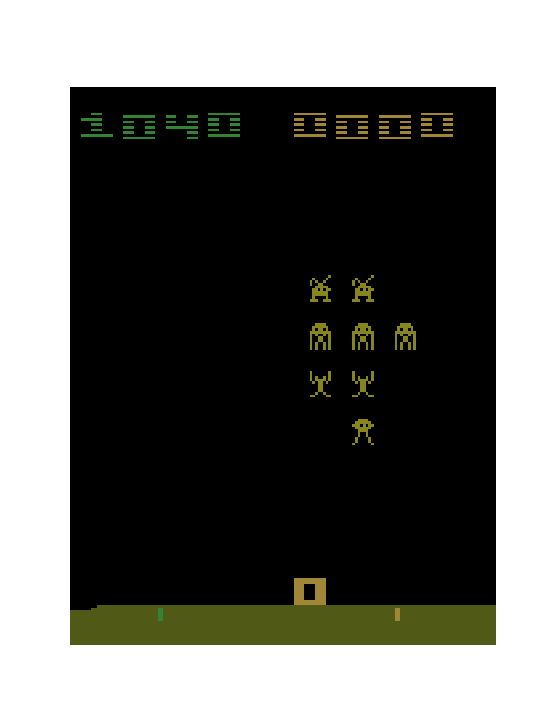

In [69]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 26.0, frames[0].shape[0] / 26.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')

def animate(i):
    patch.set_data(frames[i])

anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
HTML(anim.to_html5_video())

## Get some statistics!

<IPython.core.display.Javascript object>


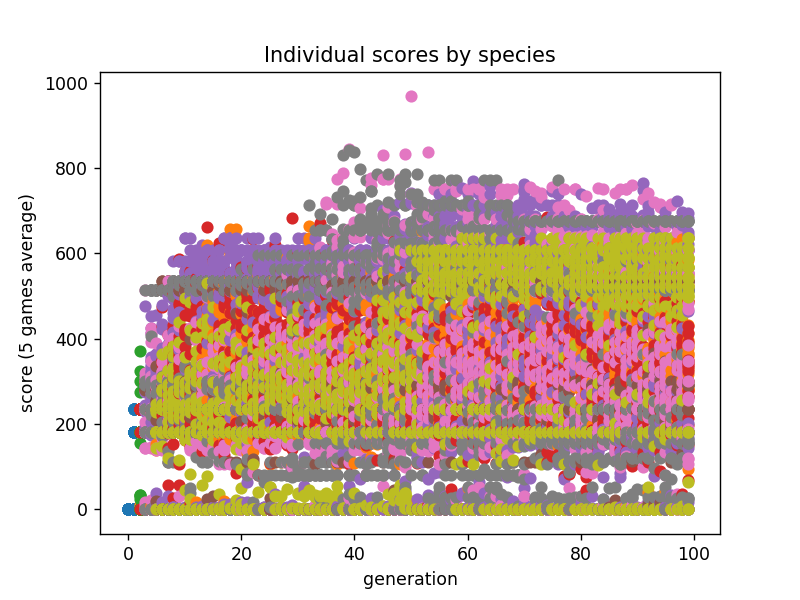

In [35]:
colors = {}
for gen in range(len(pop.statistics.generation_statistics)):
    res = pop.statistics.generation_statistics[gen]
    for key in res.keys():
        if key in colors:
            plt.scatter([gen]*len(res[key]), res[key], c=colors[key])
        else:
            plot = plt.scatter([gen]*len(res[key]), res[key])
            colors[key] = plot.get_facecolor()
plt.xlabel("generation")
plt.ylabel("score (5 games average)")
plt.title("Individual scores by species")
plt.show()

<IPython.core.display.Javascript object>


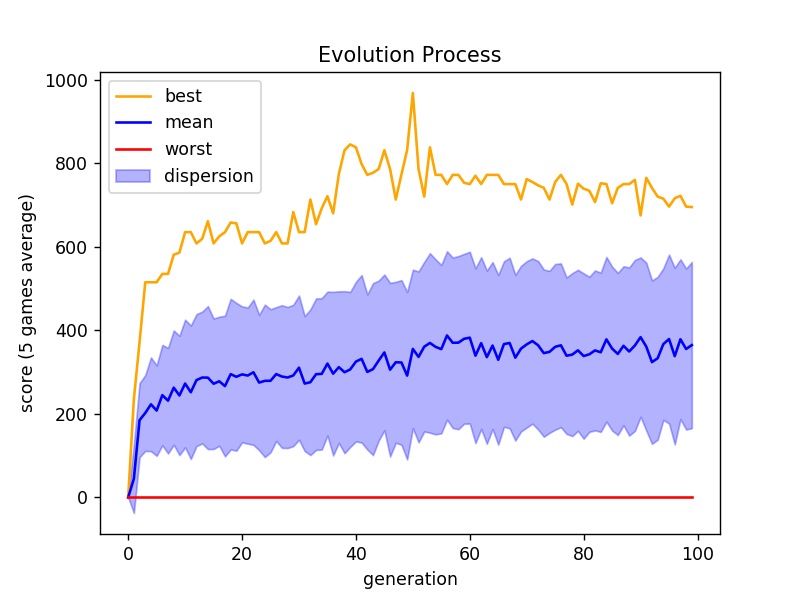

In [46]:
best = []
worst = []
mean = []
disp = []

for gen in range(len(pop.statistics.generation_statistics)):
    res = pop.statistics.generation_statistics[gen]
    individuals = []
    for key in res.keys():
        individuals = np.append(individuals, res[key])
    
    p = np.array(individuals)
    best.append(p.max())
    worst.append(p.min())
    mean.append(p.mean())
    disp.append(((p - p.mean())**2).mean()**0.5)

plt.plot(best, color='orange', label="best")
plt.plot(mean, color='b', label="mean")
plt.fill_between(np.arange(100), np.array(mean) - np.array(disp), np.array(mean) + np.array(disp), color='b', label='dispersion', alpha=0.3)
plt.plot(worst, color="r", label="worst")
plt.xlabel("generation")
plt.ylabel("score (5 games average)")
plt.legend()
plt.title("Evolution Process")
plt.show()

<IPython.core.display.Javascript object>


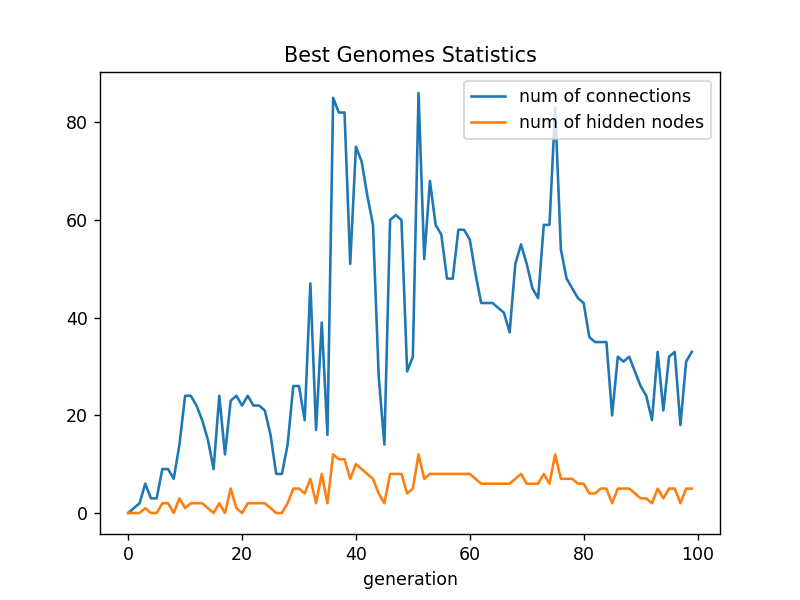

In [68]:
connections = []
hidden = []
top = pop.statistics.best_genomes(100)[::-1]
for t in top:
    connections.append(len(t.conn_genes.items()))
    hidden.append(len(t.node_genes.items()) - 134)

plt.plot(connections, label="num of connections")
plt.plot(hidden, label="num of hidden nodes")
plt.xlabel("generation")
plt.legend()
plt.title("Best Genomes Statistics")
plt.show()

## Let's look at the net!

In [21]:
from __future__ import print_function

import copy
import warnings

import graphviz
import matplotlib.pyplot as plt
import numpy as np

# this function is taken from visualize.py of neat-python package
# was not working from library itself on Windows... :o(
def draw_net(genome, view=False, filename=None, node_names=None, show_disabled=False, prune_unused=True,
             node_colors=None, fmt='svg'):
    if graphviz is None:
        warnings.warn("This display is not available due to a missing optional dependency (graphviz)")
        return

    if node_names is None:
        node_names = {}

    assert type(node_names) is dict

    if node_colors is None:
        node_colors = {}

    assert type(node_colors) is dict

    node_attrs = {
        'shape': 'circle',
        'fontsize': '9',
        'height': '0.2',
        'width': '0.2'}

    dot = graphviz.Digraph(format=fmt, node_attr=node_attrs)

    inputs = set()
    for k in range(genome.num_inputs):
        inputs.add(k)
        name = node_names.get(k, str(k))
        input_attrs = {'style': 'filled',
                       'shape': 'box'}
        input_attrs['fillcolor'] = node_colors.get(k, 'lightgray')
        dot.node(name, _attributes=input_attrs)

    outputs = set()
    for k in range(genome.num_inputs, genome.num_inputs+genome.num_outputs):
        outputs.add(k)
        name = node_names.get(k, str(k))
        node_attrs = {'style': 'filled'}
        node_attrs['fillcolor'] = node_colors.get(k, 'lightblue')

        dot.node(name, _attributes=node_attrs)

    if prune_unused:
        connections = set()
        for cg in genome.conn_genes.values():
            if cg.enabled or show_disabled:
                connections.add((cg.in_node_id, cg.out_node_id))

        used_nodes = copy.copy(outputs)
        pending = copy.copy(outputs)
        while pending:
            new_pending = set()
            for a, b in connections:
                if b in pending and a not in used_nodes:
                    new_pending.add(a)
                    used_nodes.add(a)
            pending = new_pending
    else:
        used_nodes = set(genome.node_genes.keys())

    for n in used_nodes:
        if n in inputs or n in outputs:
            continue

        attrs = {'style': 'filled',
                 'fillcolor': node_colors.get(n, 'white')}
        dot.node(str(n), _attributes=attrs)

    for cg in genome.conn_genes.values():
        if cg.enabled or show_disabled:
            #if cg.input not in used_nodes or cg.output not in used_nodes:
            #    continue
            input, output = cg.key
            a = node_names.get(input, str(input))
            b = node_names.get(output, str(output))
            style = 'solid' if cg.enabled else 'dotted'
            color = 'green' if cg.weight > 0 else 'red'
            width = str(0.1 + abs(cg.weight / 5.0))
            dot.edge(a, b, _attributes={'style': style, 'color': color, 'penwidth': width})

    return dot

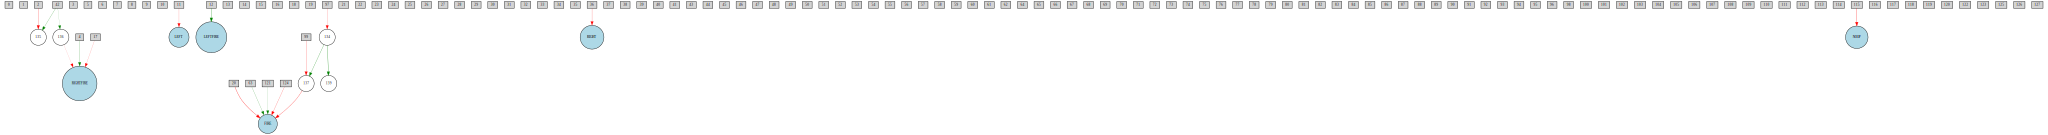

In [22]:
node_names = {}
for i in range(6):
    node_names[i+128] = my_env.unwrapped.get_action_meanings()[i]

draw_net(winner, True, node_names=node_names)

In [28]:
dot = draw_net(winner, True, node_names=node_names)
dot.render(filename="final net")  # saving to file